In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Загрузка данных

In [2]:
df=pd.read_excel('transactions_data.xlsx')

In [3]:
df.head()


,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,2025-03-10 17:16:50,Структурирование капитала,37514.809209,Неизвестно,New Zacharyport,Frank Pollard
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,2025-02-13 19:43:49,Структурирование капитала,21022.146872,Неизвестно,Port Michellemouth,Alexandra Meyer
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas
4,421aaf04-c97d-42ac-b35f-09a56bbaf910,3f43d7bc-37f0-4535-8391-51702d6ff81e,2025-03-18 21:00:36,Структурирование капитала,5636.586955,Неизвестно,Bondstad,Melissa Pena


In [4]:
df.describe(include='all')

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant
count,9526,9798,10000,10000,9540.000000,10000,10000,10000
unique,9526,9798,8986,6,NaN,5,51,51
top,99585f82-4706-46d7-989c-405da9bb57ef,c64b36c3-7742-49f9-881b-f1983ead1dc3,INVALID_DATE,Инвестиционное консультирование,NaN,Кредитная карта,Неизвестный город,Неизвестный консультант
freq,1,1,1005,2429,NaN,3999,383,368
mean,NaN,NaN,NaN,NaN,49246.781517,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,37961.999532,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,14.044907,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,19074.838850,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,41651.706800,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,71378.894526,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    9526 non-null   object 
 1   client_id         9798 non-null   object 
 2   transaction_date  10000 non-null  object 
 3   service           10000 non-null  object 
 4   amount            9540 non-null   float64
 5   payment_method    10000 non-null  object 
 6   city              10000 non-null  object 
 7   consultant        10000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [6]:
### форматирование названий столбцов (т.к. в исходных могут быть  лишние пробелы)
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

нужно изменить формат даты на datetime



In [7]:
df['transaction_date']=pd.to_datetime(df['transaction_date'],errors='coerce')
df.dtypes

transaction_id              object
client_id                   object
transaction_date    datetime64[ns]
service                     object
amount                     float64
payment_method              object
city                        object
consultant                  object
dtype: object

## 1.	Очистка и подготовка данных



обработка пустых значений


In [8]:
df.isnull().sum()


transaction_id       474
client_id            202
transaction_date    1005
service                0
amount               460
payment_method         0
city                   0
consultant             0
dtype: int64

заполняем пропуски с помощью sklearn, строки где нет id придется удалить, так как они обеспечивают целостность данных в базе. Если перезадать id это может вызвать ошибки при попытке выполнить операции соединения с другими таблицами в будущем.

смотрим распределение дат, чтобы выбрать способ обработать пропуски

<Axes: >

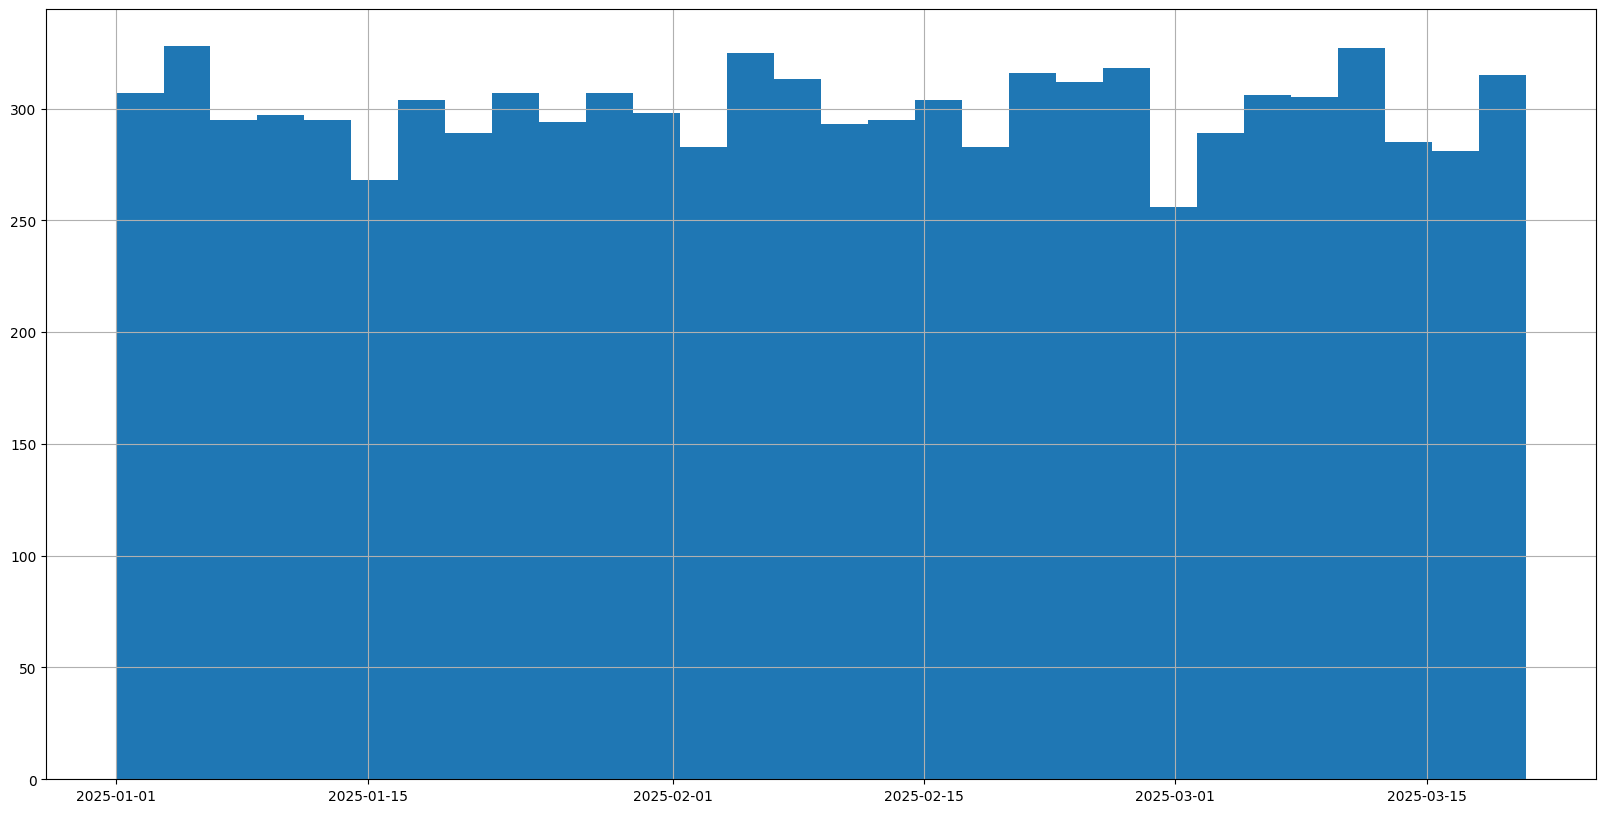

In [9]:
fig=plt.figure(figsize=(20,10))
df['transaction_date'].hist(bins=30)


Заполняю пропуски медианным значением

In [10]:
df['transaction_date'] = df['transaction_date'].fillna(df['transaction_date'].median())

In [11]:
# Замена пропусков в amount на среднее значение по столбцу
df['amount'] = df['amount'].fillna(df['amount'].mean())
#удаляю строки без id
df.dropna(inplace=True)
df.isnull().sum()

transaction_id      0
client_id           0
transaction_date    0
service             0
amount              0
payment_method      0
city                0
consultant          0
dtype: int64

In [12]:
#удаляем дубли
df = df.drop_duplicates()
df.shape

(9335, 8)

### Обработка аномалий

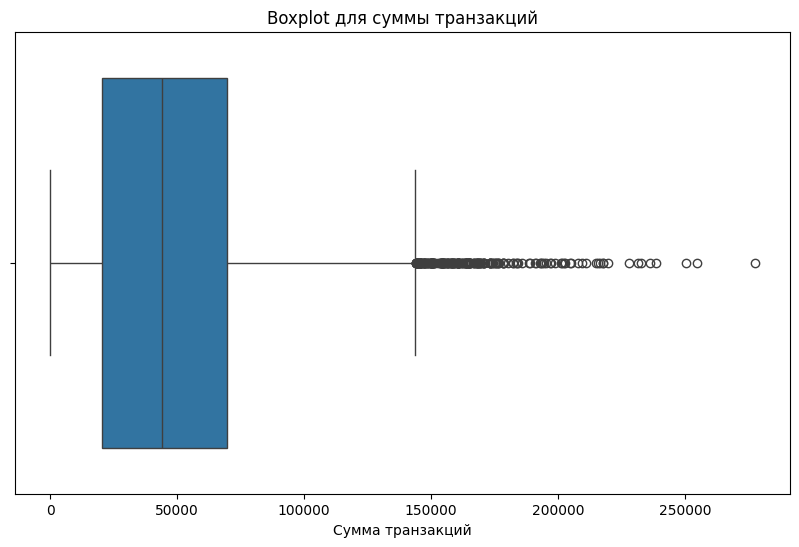

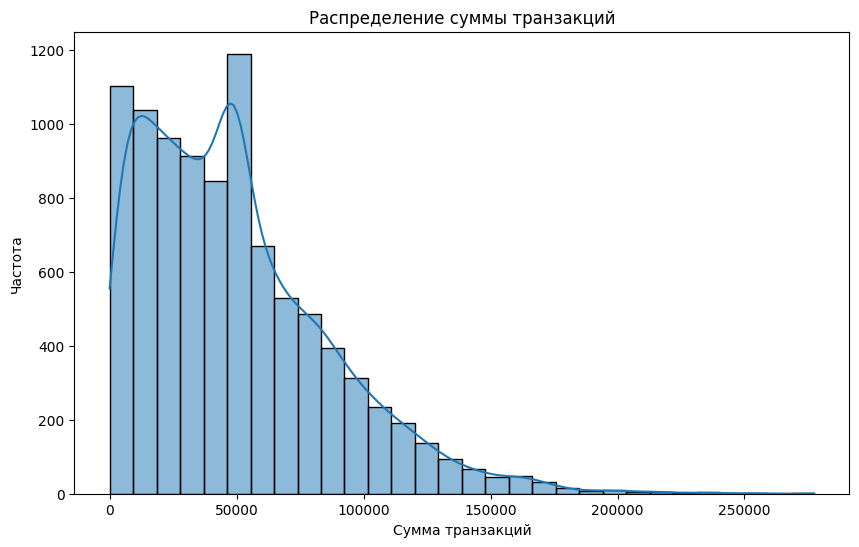

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot для суммы транзакций')
plt.xlabel('Сумма транзакций')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Распределение суммы транзакций')
plt.xlabel('Сумма транзакций')
plt.ylabel('Частота')
plt.show()



Аномальные amount (порог: 143691.37):


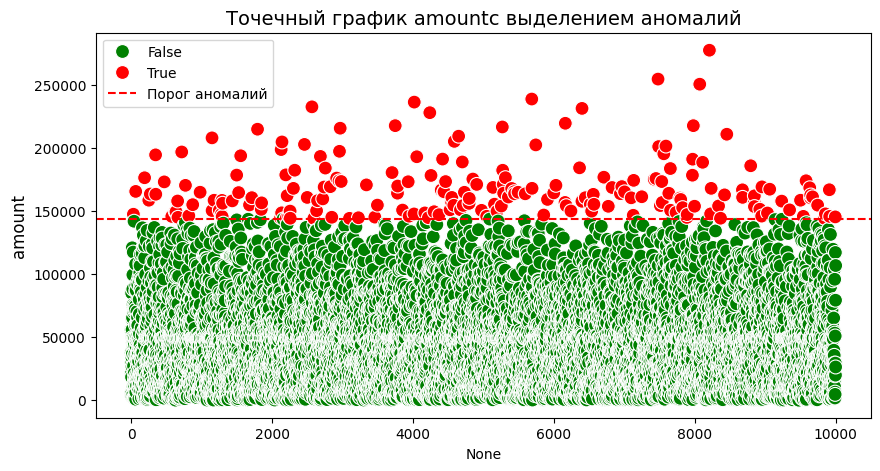

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant
32,56c47177-7417-4e34-ba21-5ab5b2a2fad2,cf1915e8-c11a-410c-aae4-3a93839b9672,2025-01-08 06:00:13,Финансовое планирование,147439.369086,Кредитная карта,Krystalland,Patricia Haas
65,c4582dcc-f40d-41f6-b9cc-70b68ab93c92,ed0462cc-c6e6-4ae2-9975-3f89ff3de2c5,2025-03-12 10:30:39,Управление активами,165531.626439,Банковский перевод,Trevinoberg,David Thompson
191,3c8a0394-24fa-4afa-a0e9-71b3b91d1dc8,55a7e975-8472-44f4-aefd-09f58c5853c5,2025-02-17 16:31:10,Инвестиционное консультирование,176346.818037,Банковский перевод,East Melissaville,Travis Curtis
251,ebf633f0-6da3-4a70-8944-b726ebf6a31f,ec4864a3-a7ce-46c5-a71c-d6de185ef272,2025-01-30 01:21:33,Инвестиционное консультирование,158548.065675,Кредитная карта,Trevinoberg,Emily Stewart
272,9f9cb2cd-173e-4f4f-aa4e-4321d86a8cef,b29a3328-dffc-4468-8ff7-ec9cba239cf3,2025-01-16 18:16:31,Управление активами,163445.690198,Кредитная карта,Hamiltontown,Michelle Morse
...,...,...,...,...,...,...,...,...
9841,2560427f-61b0-47dd-a0b5-d0288bb6f5ca,70e96c4e-2a83-42a6-afa1-3814e8ecc942,2025-01-13 16:39:23,Управление активами,144222.388892,Банковский перевод,Port Michellemouth,Alexandra Meyer
9853,db0ad9ca-3e72-43ef-b290-5d2d2f5b25ad,14331627-e821-4f84-aac0-4a474b304445,2025-02-12 07:55:13,Финансовое планирование,147700.345858,Кредитная карта,Port Michellemouth,Timothy Brown
9909,354b1274-4fd7-4b02-9605-2e9dc76323bd,388f5c91-eeee-40fc-828a-e869a01086be,2025-01-26 19:41:12,Неизвестная услуга,166848.901370,Неизвестно,New Tommyborough,Frank Pollard
9914,cb28b9b3-de33-462e-b636-02747066e831,e782cbda-44e3-450e-8553-816480d2e295,2025-03-20 10:27:02,Инвестиционное консультирование,145708.113280,Кредитная карта,Karenville,Phillip White


In [14]:
delay_stats = df['amount'].describe()
q1 = delay_stats['25%']
q3 = delay_stats['75%']
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr

anomalies = df[df['amount']> upper_bound]
print(f"\nАномальные amount (порог: {upper_bound:.2f}):")



plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['amount'], hue=df['amount'] > upper_bound, 
                palette={True: 'red', False: 'green'}, s=100)
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Порог аномалий')
plt.title('Точечный график amountс выделением аномалий', fontsize=14)
plt.ylabel('amount', fontsize=12)
plt.legend()
plt.show()
anomalies

<Axes: >

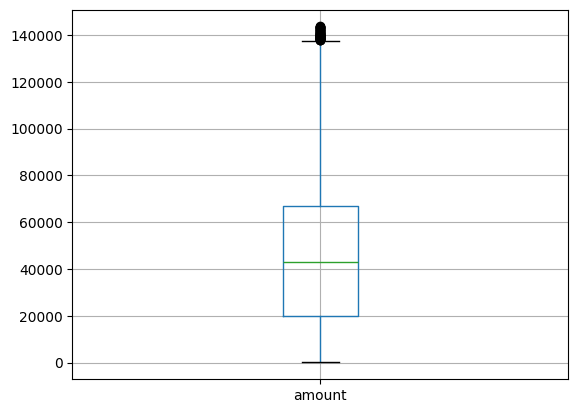

In [15]:
df= df[df['amount'] <= upper_bound]
df[['amount']].boxplot()

In [16]:
from sklearn.ensemble import IsolationForest
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_timestamp'] = df['transaction_date'].astype(int) / 10**9  # Преобразуем в секунды

# Выбор необходимых столбцов
X = df[['transaction_timestamp', 'amount']]

# Создание модели Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Предсказание аномалий
y_pred = model.predict(X)

# Выделение нормальных данных и аномалий
normal_data = X[y_pred == 1]
anomalies = X[y_pred == -1]

# Вывод аномальных значений
print("Аномальные значения:")
print(anomalies)


Аномальные значения:
      transaction_timestamp         amount
4              1.742332e+09    5636.586955
8              1.736193e+09   84945.352622
16             1.741466e+09  120835.547581
20             1.742474e+09   65395.128421
24             1.735785e+09   88036.470283
...                     ...            ...
9927           1.736257e+09   89871.108514
9960           1.740367e+09  119703.028522
9981           1.742215e+09  103824.614793
9989           1.736247e+09    1779.592820
9995           1.736831e+09  117114.096418

[913 rows x 2 columns]


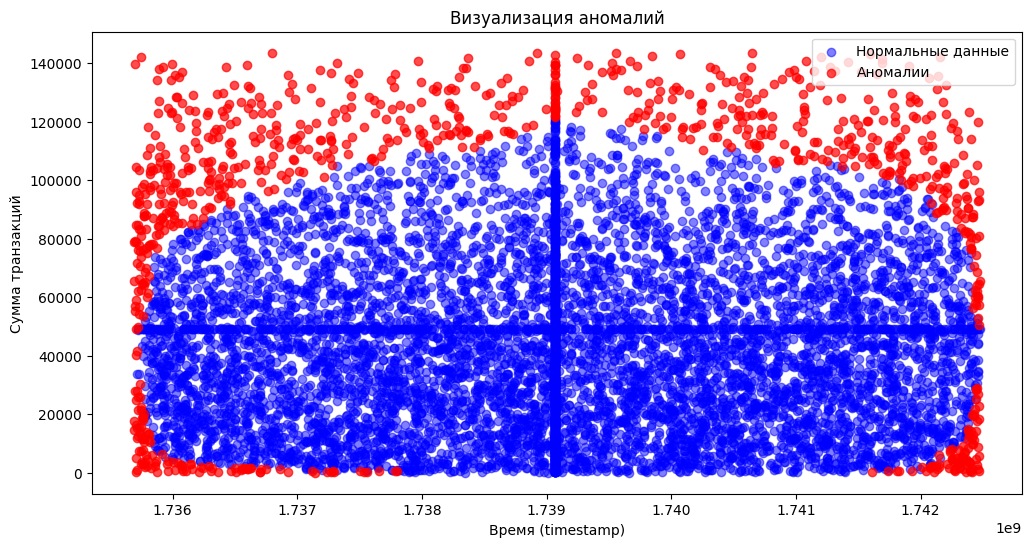

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(normal_data['transaction_timestamp'], normal_data['amount'], color='blue', label='Нормальные данные', alpha=0.5)
plt.scatter(anomalies['transaction_timestamp'], anomalies['amount'], color='red', label='Аномалии', alpha=0.7)
plt.title('Визуализация аномалий')
plt.xlabel('Время (timestamp)')
plt.ylabel('Сумма транзакций')
plt.legend()
plt.show()

<Axes: >

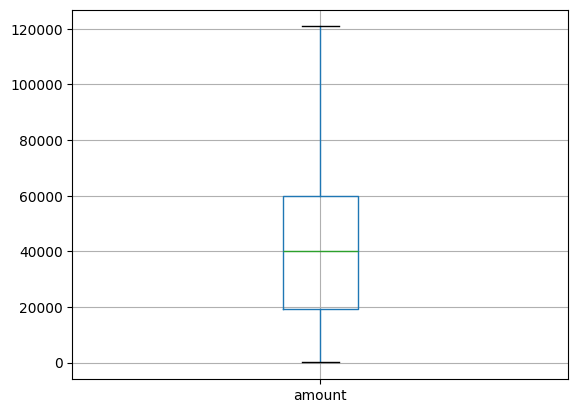

In [18]:
df = df[y_pred != -1]
df[['amount']].boxplot()


Сначала применили статистический поиск аномалий используя межквартильный интервал, что помогло отсеять очевидные и видимые аномалии.Затем использутеся  Isolation Forest для более глубокого анализа.

In [19]:
df[['transaction_date']].describe()

,transaction_date
count,8215
mean,2025-02-09 17:12:56.423250176
min,2025-01-01 07:45:55
25%,2025-01-24 22:34:18
50%,2025-02-09 02:01:41
75%,2025-02-25 19:00:45.500000
max,2025-03-20 12:30:55


Аномалных значений в датах не выявлено.


In [20]:
print(df['service'].unique())
print(df['payment_method'].unique())
print(df['city'].unique())


['Структурирование капитала' 'Инвестиционное консультирование'
 'Неизвестная услуга' 'Налоговое планирование' 'Финансовое планирование'
 'Управление активами']
['Банковский перевод' 'Неизвестно' 'Кредитная карта' 'Криптовалюта'
 'Наличные']
['North Patrickport' 'New Zacharyport' 'Port Michellemouth'
 'West Jaymouth' 'Johnsonfort' 'Tonystad' 'Elizabethmouth' 'Ronaldville'
 'Matthewsville' 'North Lauriebury' 'Jeanettetown' 'Trevinoberg'
 'Hamiltontown' 'Davidmouth' 'Davidsonborough' 'New Dianechester'
 'Lake Arielmouth' 'Cruzport' 'Krystalland' 'Aprilstad' 'South Thomas'
 'South Andrew' 'Erichaven' 'Неизвестный город' 'West Meredithhaven'
 'Lake Tina' 'North Melissaland' 'New Ryan' 'Patelbury' 'Michellehaven'
 'Mayoberg' 'Dannyburgh' 'East Melissaville' 'Port Jordan' 'North Emily'
 'Ibarramouth' 'New Chelseaberg' 'New Tommyborough' 'Roberttown'
 'Port James' 'North Hannahmouth' 'East Matthewmouth' 'East Jamie'
 'Karenville' 'Kaneburgh' 'Mirandaside' 'Harrisberg' 'Bondstad'
 'Lake Sallych

Тут тоже ничего аномального нет, кроме значений 'неизвестно', но я их удалю чтобы не мешали анализу.

In [21]:
df = df[(df['service'] != 'Неизвестная услуга') & 
         (df['payment_method'] != 'Неизвестно') & 
         (df['city'] != 'Неизвестный город')]

## Анализ данных


топ-5 наиболее популярных услуг по количеству заказов

C:\Users\user\AppData\Local\Temp\ipykernel_3436\2019076623.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_pop5.index, y=df_pop5.values, palette=palette,width=0.5)


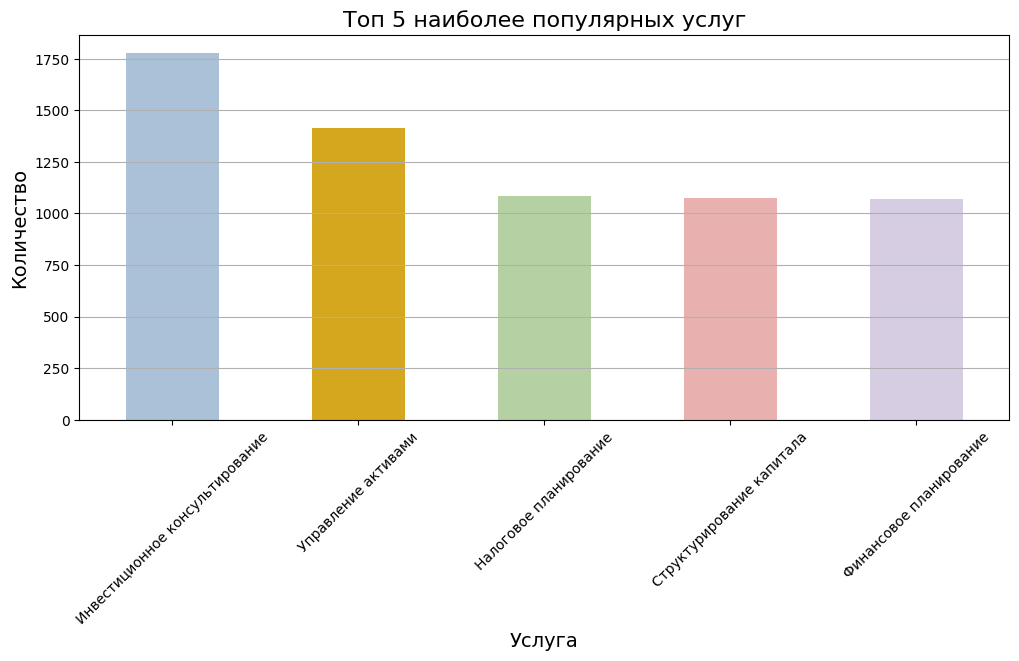

In [22]:
df_pop5 = df.groupby('service').size().nlargest(5)

colors = {
    "Инвестиционное консультирование": "#a3c1e0",  # светло-голубой
    "Управление активами": "#f2b600",             # светло-оранжевый
    "Налоговое планирование": "#b3d99c",          # светло-зеленый
    "Структурирование капитала": "#f2a6a6",       # светло-розовый
    "Финансовое планирование": "#d5c9e6"           # светло-лавандовый
}


# Создание списка цветов в том же порядке, что и индексы df_pop5
palette = [colors[service] for service in df_pop5.index]
 
plt.figure(figsize=(12, 5))
sns.barplot(x=df_pop5.index, y=df_pop5.values, palette=palette,width=0.5)
plt.title('Топ 5 наиболее популярных услуг', fontsize=16)
plt.xlabel('Услуга', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3436\1477441603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mean_city, y='city', x='amount', palette='viridis')


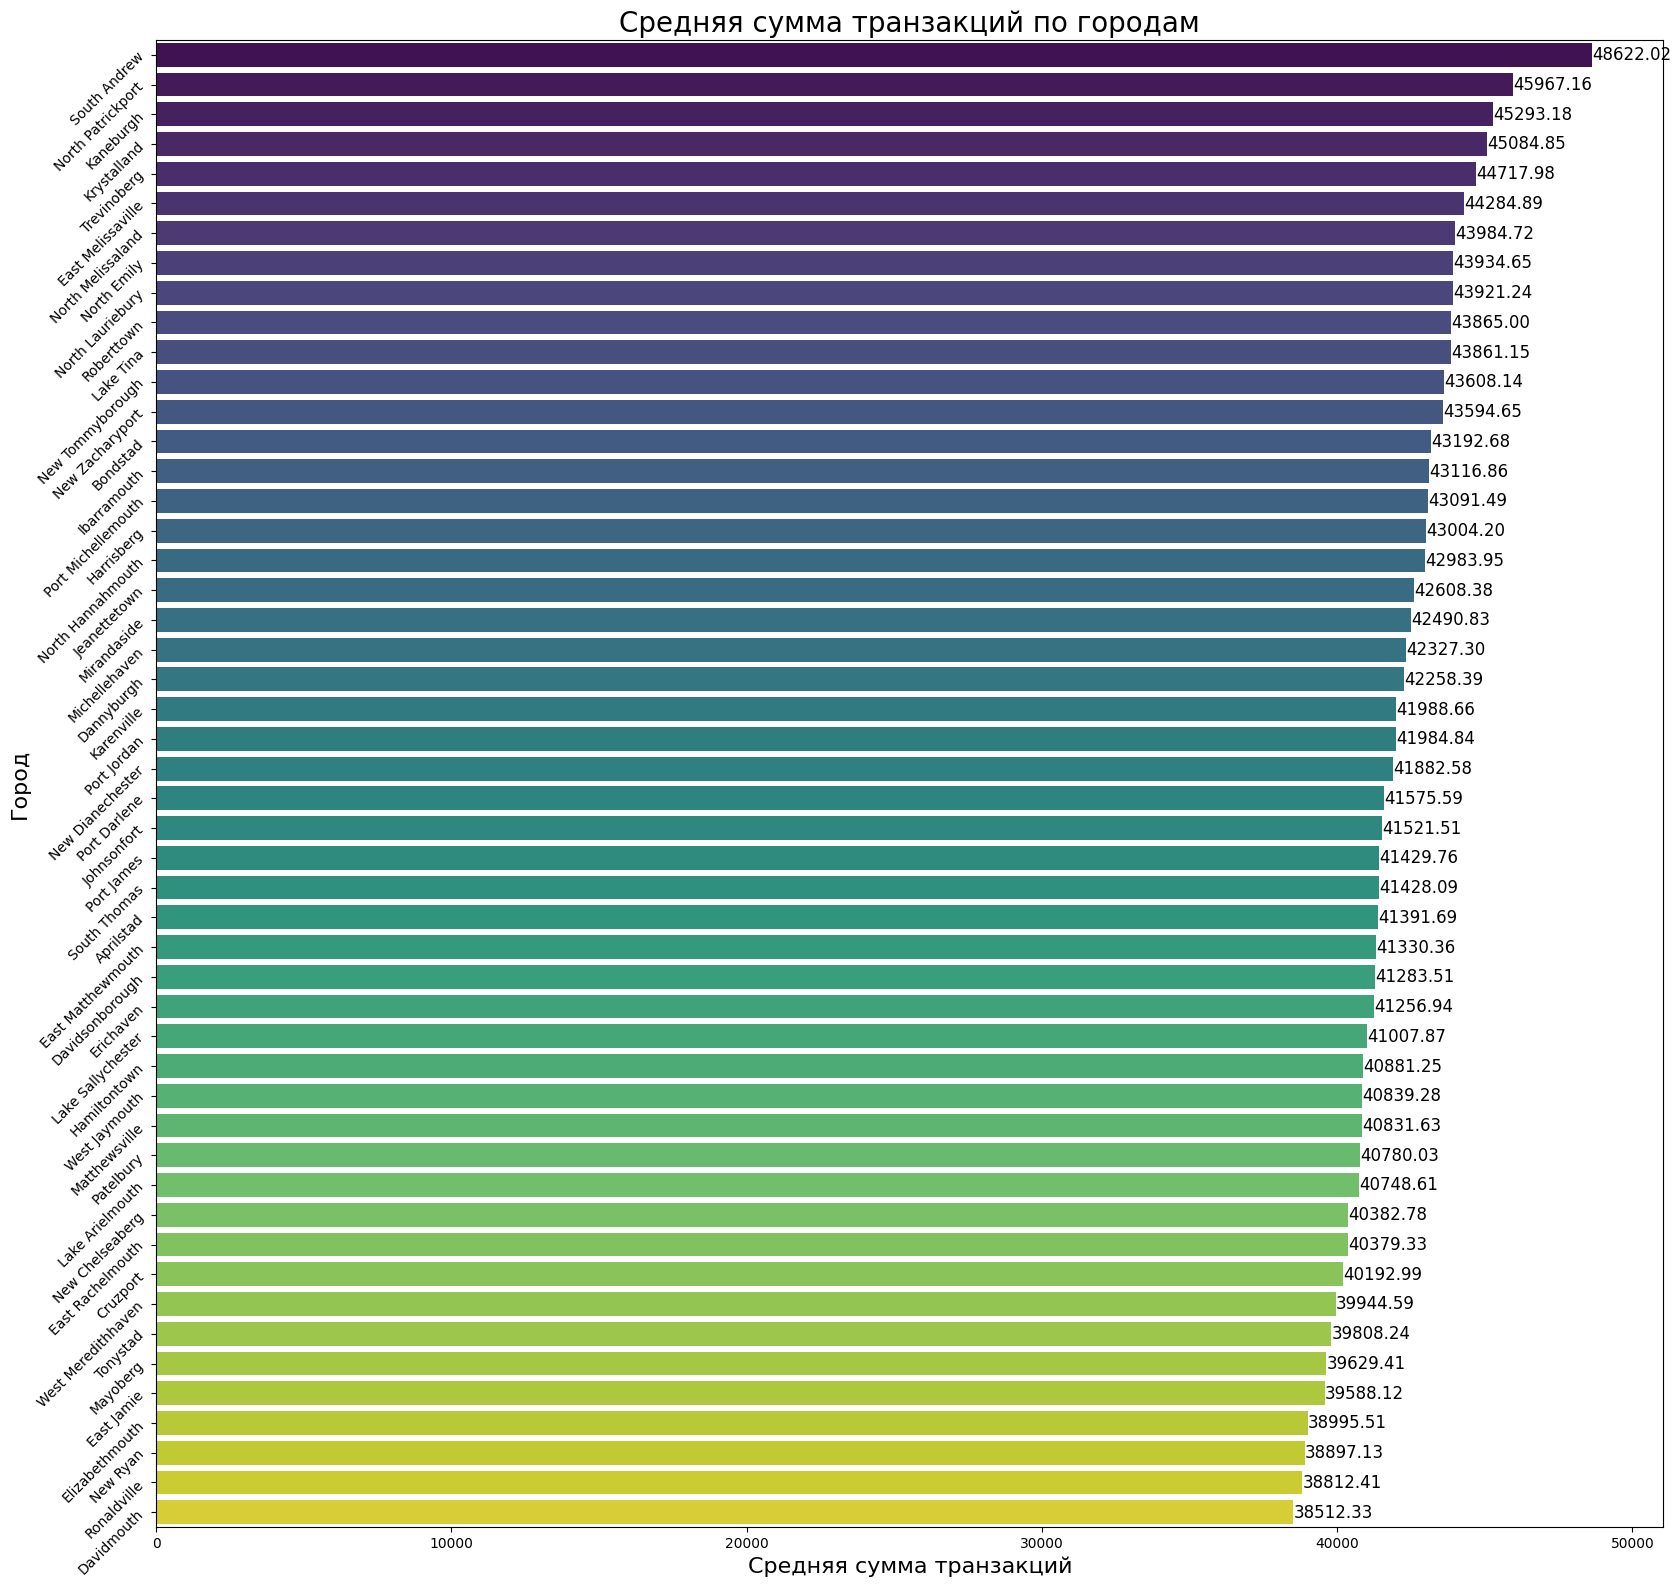

In [23]:
df_mean_city = df.groupby('city')['amount'].mean().reset_index()
df_mean_city = df_mean_city.sort_values('amount', ascending=False)

plt.figure(figsize=(17, 16))
sns.barplot(data=df_mean_city, y='city', x='amount', palette='viridis')
 
plt.title('Средняя сумма транзакций по городам', fontsize=20)
plt.xlabel('Средняя сумма транзакций', fontsize=16)
plt.ylabel('Город', fontsize=16)

# Добавление меток данных
for i, (index, row) in enumerate(df_mean_city.iterrows()):
    plt.text(row['amount'] + 0.0001 * max(df_mean_city['amount']),  # Отступ от столбца
             i,  # Позиция по оси Y соответствует индексу столбца
             f'{row["amount"]:.2f}',  # Форматирование числа
             color='black',
             ha='left',
             va='center',
             fontsize=12)  #   размер шрифта

 
plt.yticks(rotation=45)

 
plt.tight_layout()
plt.show()

In [24]:
df_pop = df.groupby('payment_method')['amount'].sum().nlargest(1)


print('Услуга с наибольшей выручкой:')
print(df_pop.index[0])  
print(df_pop.values[0])  

Услуга с наибольшей выручкой:
Кредитная карта
120871343.00344963


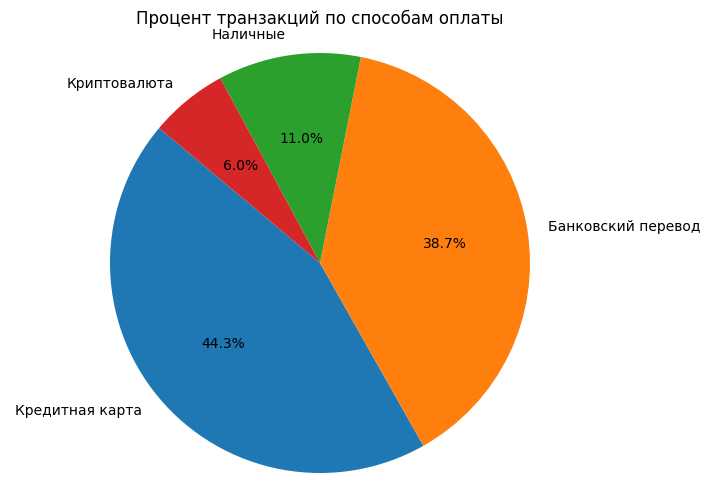

In [25]:
payment_counts = df['payment_method'].value_counts()

# Рассчитываем процент транзакций
payment_percentage = (payment_counts / payment_counts.sum()) * 100


plt.figure(figsize=(8, 6))
plt.pie(payment_percentage, labels=payment_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Процент транзакций по способам оплаты')
plt.axis('equal') 
plt.show()

In [26]:
last_month = df['transaction_date'].max().to_period('M')

# Фильтруем данные за последний месяц
last_month_data = df[df['transaction_date'].dt.to_period('M') == last_month]

# Рассчитываем выручку
revenue_last_month = last_month_data['amount'].sum()
print(f'Выручка за последний месяц ({last_month}):', revenue_last_month)

Выручка за последний месяц (2025-03): 56626055.53792398


In [27]:
df

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant,transaction_timestamp
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,1.735949e+09
5,822d5795-4f08-4a7a-9692-7f5863945bdf,900f7d6b-ee7f-49e6-ae9f-e5ea9e04ab4c,2025-02-21 21:50:30,Инвестиционное консультирование,85575.773285,Кредитная карта,West Jaymouth,Harold Gibson,1.740175e+09
7,56daf0d6-6f65-45a2-8895-8bcbcf0a7f51,9f6d2dfb-20af-4329-8383-7bd7b14f2480,2025-03-11 22:56:28,Налоговое планирование,5590.175424,Банковский перевод,Tonystad,Ethan Lowe,1.741734e+09
9,5fcd81cd-379c-4dc7-a70e-f4ace842f3df,9f29e688-86ca-46f2-bfdd-0a9d33013f47,2025-01-27 17:59:07,Финансовое планирование,29785.105420,Криптовалюта,Elizabethmouth,Ronald Shepherd,1.738001e+09
10,e5f0b30c-322d-448e-9bfe-152a8d15c943,d88d56e9-5b1c-4d9e-8453-5ec594f38eed,2025-03-08 01:20:51,Управление активами,3193.128156,Кредитная карта,Johnsonfort,Jordan Phillips,1.741397e+09
...,...,...,...,...,...,...,...,...,...
9991,7d35d69f-8b66-4fac-827c-e7bf48946c19,4c39038a-2332-4725-bb53-37add6f3f934,2025-03-08 09:44:55,Управление активами,4636.558233,Банковский перевод,Cruzport,Deborah Stone,1.741427e+09
9992,76461183-5bb7-47d6-94da-42ce94e3b9e0,bd947901-99b1-4e55-8d5f-055744d9771f,2025-02-05 05:13:45,Структурирование капитала,50933.987910,Наличные,Tonystad,Cynthia Coleman,1.738732e+09
9996,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,2025-02-09 02:01:41,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd,1.739067e+09
9998,f5df7e5e-5e5e-4492-afc7-98040ff89dde,77ea6e72-df3c-47d4-a043-f990cc05a6f4,2025-01-21 03:54:39,Инвестиционное консультирование,26365.015457,Криптовалюта,Tonystad,David Palmer,1.737432e+09


In [28]:
df_2=pd.read_json('clients_data.json')
df_2

,id,age,gender,net_worth
0,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,41.0,Мужчина,2514729.46
1,c940f45c-d29b-439a-8fa3-f75018cef528,28.0,Мужчина,566568.29
2,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,55.0,Женщина,1896001.28
3,None,38.0,Женщина,4538759.60
4,3f43d7bc-37f0-4535-8391-51702d6ff81e,31.0,Мужчина,4865849.92
...,...,...,...,...
9794,b79d6e9f-75f6-4af9-8fdf-b42aac298a84,33.0,Женщина,699254.80
9795,d2a4a79b-26ba-41c9-b720-1362b9f464f0,31.0,None,2856777.27
9796,5e1d67fb-26ea-48cc-9e2d-e2edbda404d0,49.0,None,3865097.90
9797,77ea6e72-df3c-47d4-a043-f990cc05a6f4,33.0,Женщина,4873134.42


In [29]:
merge_df=pd.merge(df,df_2,right_on='id',left_on='client_id',how='left')

In [30]:
merge_df

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant,transaction_timestamp,id,age,gender,net_worth
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,1.735949e+09,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,41.0,Мужчина,2514729.46
1,822d5795-4f08-4a7a-9692-7f5863945bdf,900f7d6b-ee7f-49e6-ae9f-e5ea9e04ab4c,2025-02-21 21:50:30,Инвестиционное консультирование,85575.773285,Кредитная карта,West Jaymouth,Harold Gibson,1.740175e+09,900f7d6b-ee7f-49e6-ae9f-e5ea9e04ab4c,59.0,Женщина,3992281.84
2,56daf0d6-6f65-45a2-8895-8bcbcf0a7f51,9f6d2dfb-20af-4329-8383-7bd7b14f2480,2025-03-11 22:56:28,Налоговое планирование,5590.175424,Банковский перевод,Tonystad,Ethan Lowe,1.741734e+09,9f6d2dfb-20af-4329-8383-7bd7b14f2480,20.0,Мужчина,4869978.39
3,5fcd81cd-379c-4dc7-a70e-f4ace842f3df,9f29e688-86ca-46f2-bfdd-0a9d33013f47,2025-01-27 17:59:07,Финансовое планирование,29785.105420,Криптовалюта,Elizabethmouth,Ronald Shepherd,1.738001e+09,9f29e688-86ca-46f2-bfdd-0a9d33013f47,50.0,None,3689076.61
4,e5f0b30c-322d-448e-9bfe-152a8d15c943,d88d56e9-5b1c-4d9e-8453-5ec594f38eed,2025-03-08 01:20:51,Управление активами,3193.128156,Кредитная карта,Johnsonfort,Jordan Phillips,1.741397e+09,d88d56e9-5b1c-4d9e-8453-5ec594f38eed,40.0,None,953727.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,7d35d69f-8b66-4fac-827c-e7bf48946c19,4c39038a-2332-4725-bb53-37add6f3f934,2025-03-08 09:44:55,Управление активами,4636.558233,Банковский перевод,Cruzport,Deborah Stone,1.741427e+09,4c39038a-2332-4725-bb53-37add6f3f934,26.0,None,381019.85
6411,76461183-5bb7-47d6-94da-42ce94e3b9e0,bd947901-99b1-4e55-8d5f-055744d9771f,2025-02-05 05:13:45,Структурирование капитала,50933.987910,Наличные,Tonystad,Cynthia Coleman,1.738732e+09,bd947901-99b1-4e55-8d5f-055744d9771f,46.0,None,NaN
6412,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,2025-02-09 02:01:41,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd,1.739067e+09,d2a4a79b-26ba-41c9-b720-1362b9f464f0,31.0,None,2856777.27
6413,f5df7e5e-5e5e-4492-afc7-98040ff89dde,77ea6e72-df3c-47d4-a043-f990cc05a6f4,2025-01-21 03:54:39,Инвестиционное консультирование,26365.015457,Криптовалюта,Tonystad,David Palmer,1.737432e+09,77ea6e72-df3c-47d4-a043-f990cc05a6f4,33.0,Женщина,4873134.42


In [31]:
# Функция для определения уровня активов
def asset_level(amount):
    if amount < 100000:
        return 'Низкий капитал'
    elif 100000 <= amount <= 1000000:
        return 'Средний капитал'
    else:
        return 'Высокий капитал'

# Создаем новую колонку с уровнями активов
merge_df['asset_level'] = merge_df['net_worth'].apply(asset_level)


Анализ выручки по уровням активов:
asset_level
Высокий капитал    2.202595e+08
Средний капитал    4.546172e+07
Низкий капитал     4.315111e+06
Name: amount, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_3436\3725898291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_analysis.index, y=revenue_analysis.values, palette='viridis',width=0.5)


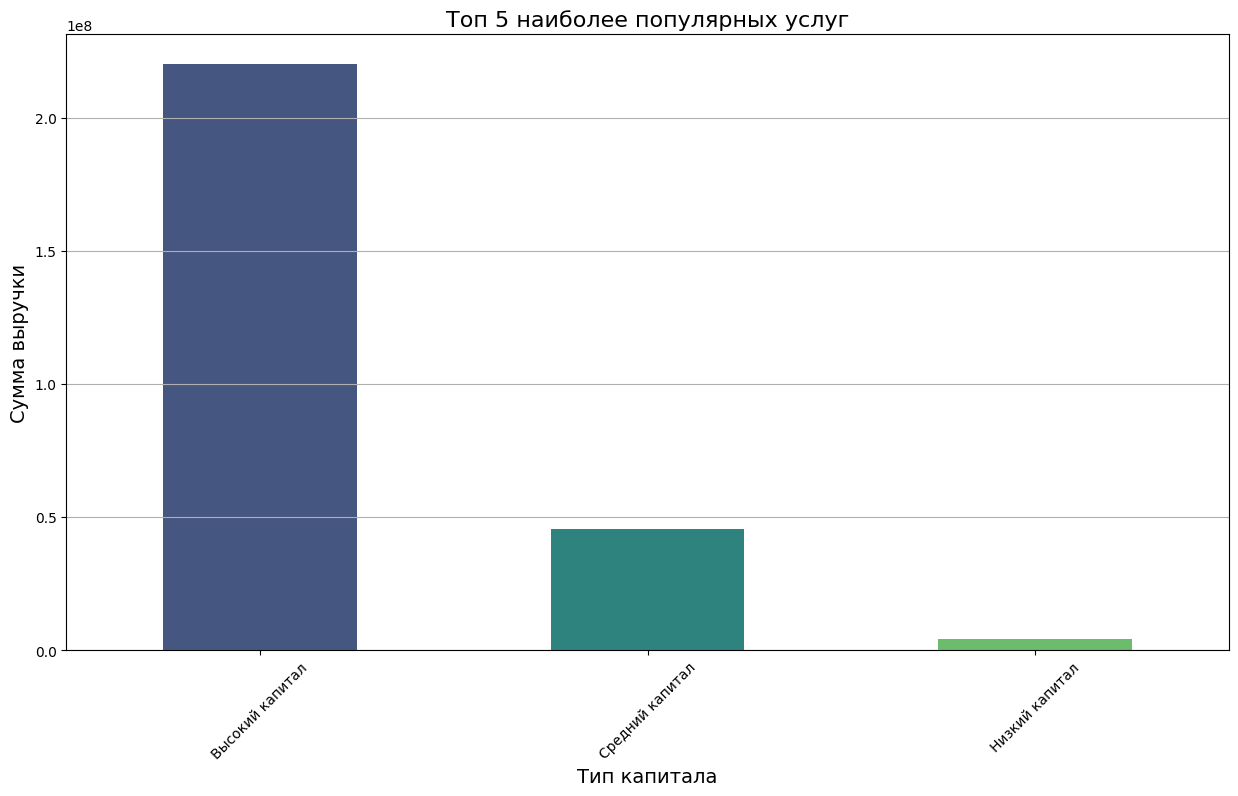

asset_level
Высокий капитал    2.202595e+08
Средний капитал    4.546172e+07
Низкий капитал     4.315111e+06
Name: amount, dtype: float64

In [32]:
# Анализ выручки по уровням активов
revenue_analysis = merge_df.groupby('asset_level')['amount'].sum().sort_values(ascending=False)

print("Анализ выручки по уровням активов:")
print(revenue_analysis)

plt.figure(figsize=(15, 8))
sns.barplot(x=revenue_analysis.index, y=revenue_analysis.values, palette='viridis',width=0.5)
plt.title('Топ 5 наиболее популярных услуг', fontsize=16)
plt.xlabel('Тип капитала', fontsize=14)
plt.ylabel('Сумма выручки', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')



plt.show()
revenue_analysis

## Распределение сумм транзакций

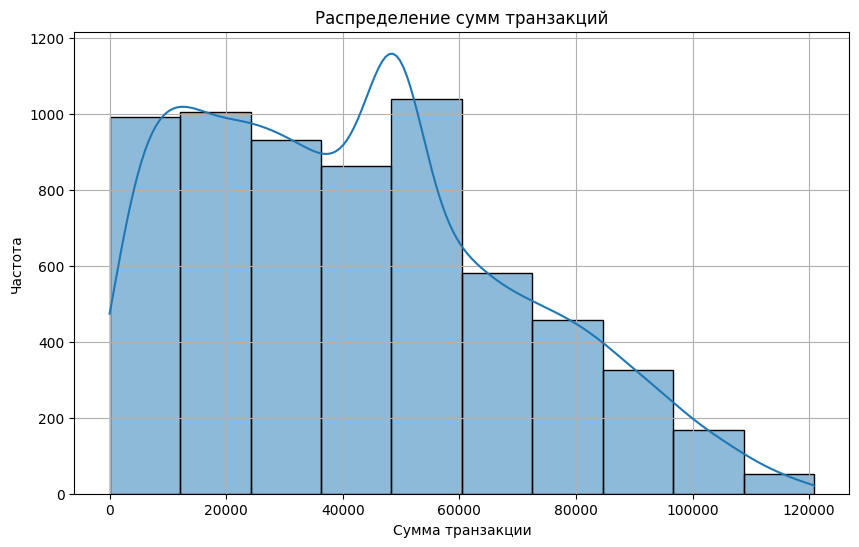

In [33]:
plt.figure(figsize=(10, 6))
plt.grid()
sns.histplot(merge_df['amount'], bins=10, kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')

plt.show()

Что можно сказать о сумме транзакций:
Разброс значений:

Минимальная сумма ~0, максимальная ~120 000 

Основная масса транзакций сосредоточена в диапазоне 0–60 000, так как там самый высокий пик.

Пики (моды) распределения:
тут несколько пиков, это может означать, что транзакции группируются вокруг определённых сумм (например, популярные тарифы или типовые платежи).


Скошенность (асимметрия):
"хвост" графика тянется вправо (к большим суммам) – распределение правостороннее (положительная асимметрия). Это означает, что большинство транзакций небольшие, но есть редкие крупные платежи.

Выводы:
Большинство транзакций небольшие (вероятно, до 40 000–60 000).

Есть редкие, но очень крупные платежи (правая часть графика).

Распределение не нормальное (скорее всего, экспоненциальное или логнормальное), что типично для финансовых данных.

## Выручка по услугам

C:\Users\user\AppData\Local\Temp\ipykernel_3436\4087878076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='service', y='amount', data=revenue_by_service,palette=palette,width=0.5)


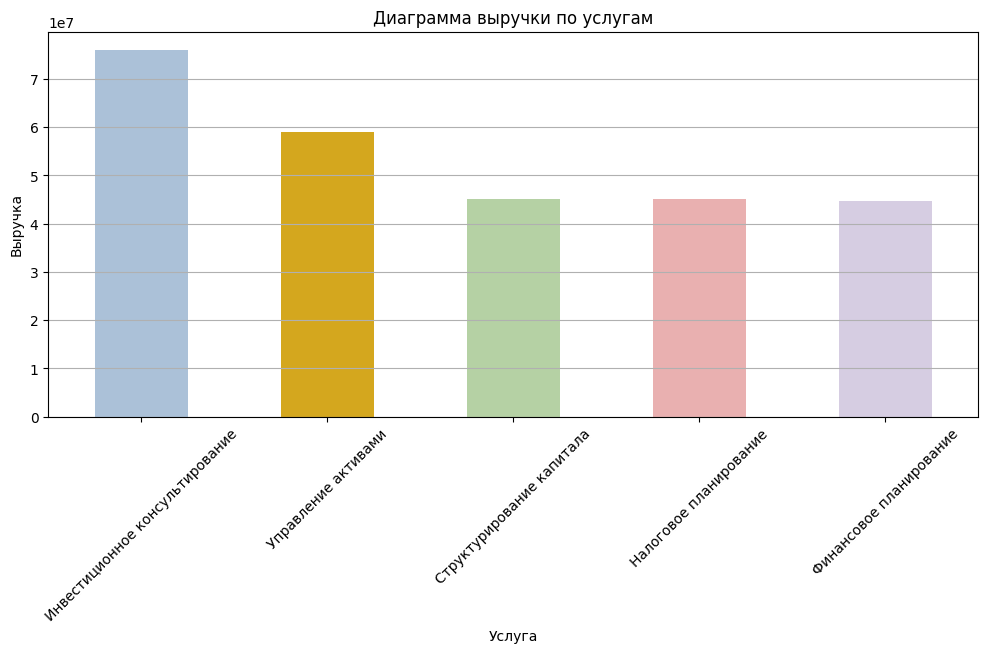

In [34]:

revenue_by_service = merge_df.groupby('service')['amount'].sum().reset_index().sort_values(by='amount',ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='service', y='amount', data=revenue_by_service,palette=palette,width=0.5)
plt.title('Диаграмма выручки по услугам')
plt.xlabel('Услуга')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Сравнительный анализ услуг

| Услуга                        | Популярность (кол-во) | Выручка          | Интерпретация                                                                 |
|-------------------------------|------------------------|-------------------|-------------------------------------------------------------------------------|
| Инвестиционное консультирование | Высокая                | Средняя/Высокая   | Востребованная услуга, но не самая прибыльная. Возможно, низкий средний чек. |
| Управление активами           | Средняя                | Очень высокая     | Дорогая услуга для состоятельных клиентов.                                   |
| Налоговое планирование        | Низкая                 | Низкая            | Мало клиентов + низкая доходность. Возможно, нишевая услуга.                 |
| Структурирование капитала     | Средняя                | Средняя           | Стабильный спрос и доход.                                                    |
| Финансовое планирование        | Низкая                 | Низкая            | Мало клиентов + низкая доходность


## Зависимость средней суммы транзакции от возраста клиентов.


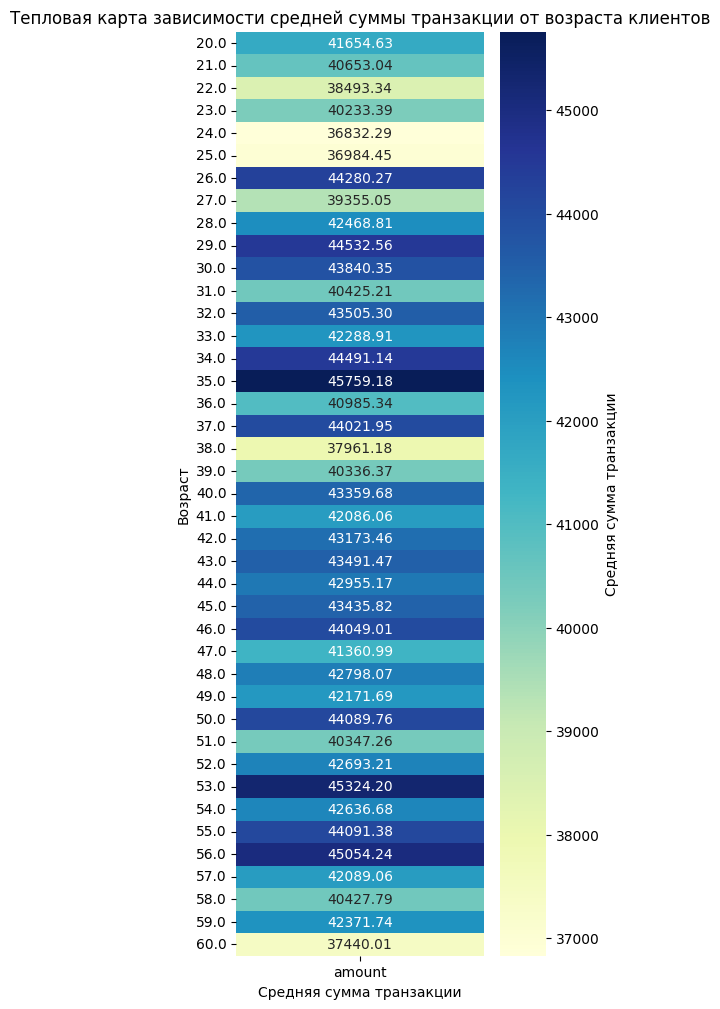

In [35]:
heatmap_data = merge_df.pivot_table(index='age', values='amount', aggfunc='mean')

# Настройка графика
plt.figure(figsize=(4, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Средняя сумма транзакции'})
plt.title('Тепловая карта зависимости средней суммы транзакции от возраста клиентов')
plt.ylabel('Возраст')
plt.xlabel('Средняя сумма транзакции')
plt.show()

Тепловая карта показывает зависимость средней суммы транзакции от возраста клиентов. Данные представлены в виде числовых значений, где для каждого возраста указана средняя сумма транзакции в рублях.

Основные наблюдения:
Наибольшие средние суммы транзакций наблюдаются у клиентов в возрасте:

35 лет (45 759.18 руб.),

53 лет (45 324.20 руб.),

56 лет (45 054.24 руб.),

29 лет (44 532.56 руб.),

34 лет (44 491.14 руб.).

Наименьшие средние суммы транзакций характерны для возрастов:

24 года (36 832.29 руб.),

25 лет (36 984.45 руб.),

60 лет (37 440.01 руб.),

38 лет (37 961.18 руб.),

22 года (38 493.34 руб.).

Общий тренд:

У клиентов в возрасте 20–25 лет средние суммы транзакций относительно низкие.

С 26 до 35 лет наблюдается рост средней суммы.

После 35 лет суммы остаются высокими, но с небольшими колебаниями.

После 58 лет средние суммы начинают снижаться.

Вывод:
Наибольшая покупательская способность (по средней сумме транзакции) наблюдается у клиентов в возрасте 30–57 лет, особенно в диапазоне 35–56 лет. Молодые (до 25 лет) и пожилые (от 58 лет) клиенты склонны совершать транзакции на меньшие суммы.

## Визуализация тренда

In [36]:
df_trend=merge_df


In [37]:
df_trend['month']=pd.to_datetime(df_trend['transaction_date']).dt.to_period('M')
df_trend


,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant,transaction_timestamp,id,age,gender,net_worth,asset_level,month
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller,1.735949e+09,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,41.0,Мужчина,2514729.46,Высокий капитал,2025-01
1,822d5795-4f08-4a7a-9692-7f5863945bdf,900f7d6b-ee7f-49e6-ae9f-e5ea9e04ab4c,2025-02-21 21:50:30,Инвестиционное консультирование,85575.773285,Кредитная карта,West Jaymouth,Harold Gibson,1.740175e+09,900f7d6b-ee7f-49e6-ae9f-e5ea9e04ab4c,59.0,Женщина,3992281.84,Высокий капитал,2025-02
2,56daf0d6-6f65-45a2-8895-8bcbcf0a7f51,9f6d2dfb-20af-4329-8383-7bd7b14f2480,2025-03-11 22:56:28,Налоговое планирование,5590.175424,Банковский перевод,Tonystad,Ethan Lowe,1.741734e+09,9f6d2dfb-20af-4329-8383-7bd7b14f2480,20.0,Мужчина,4869978.39,Высокий капитал,2025-03
3,5fcd81cd-379c-4dc7-a70e-f4ace842f3df,9f29e688-86ca-46f2-bfdd-0a9d33013f47,2025-01-27 17:59:07,Финансовое планирование,29785.105420,Криптовалюта,Elizabethmouth,Ronald Shepherd,1.738001e+09,9f29e688-86ca-46f2-bfdd-0a9d33013f47,50.0,None,3689076.61,Высокий капитал,2025-01
4,e5f0b30c-322d-448e-9bfe-152a8d15c943,d88d56e9-5b1c-4d9e-8453-5ec594f38eed,2025-03-08 01:20:51,Управление активами,3193.128156,Кредитная карта,Johnsonfort,Jordan Phillips,1.741397e+09,d88d56e9-5b1c-4d9e-8453-5ec594f38eed,40.0,None,953727.80,Средний капитал,2025-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,7d35d69f-8b66-4fac-827c-e7bf48946c19,4c39038a-2332-4725-bb53-37add6f3f934,2025-03-08 09:44:55,Управление активами,4636.558233,Банковский перевод,Cruzport,Deborah Stone,1.741427e+09,4c39038a-2332-4725-bb53-37add6f3f934,26.0,None,381019.85,Средний капитал,2025-03
6411,76461183-5bb7-47d6-94da-42ce94e3b9e0,bd947901-99b1-4e55-8d5f-055744d9771f,2025-02-05 05:13:45,Структурирование капитала,50933.987910,Наличные,Tonystad,Cynthia Coleman,1.738732e+09,bd947901-99b1-4e55-8d5f-055744d9771f,46.0,None,NaN,Высокий капитал,2025-02
6412,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,2025-02-09 02:01:41,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd,1.739067e+09,d2a4a79b-26ba-41c9-b720-1362b9f464f0,31.0,None,2856777.27,Высокий капитал,2025-02
6413,f5df7e5e-5e5e-4492-afc7-98040ff89dde,77ea6e72-df3c-47d4-a043-f990cc05a6f4,2025-01-21 03:54:39,Инвестиционное консультирование,26365.015457,Криптовалюта,Tonystad,David Palmer,1.737432e+09,77ea6e72-df3c-47d4-a043-f990cc05a6f4,33.0,Женщина,4873134.42,Высокий капитал,2025-01


In [39]:
df_grouped_m = df_trend.groupby(['month'])['amount'].sum().reset_index()
df_grouped_m


,month,amount
0,2025-01,8.979463e+07
1,2025-02,1.236157e+08
2,2025-03,5.662606e+07


In [ ]:
# Группировка по month, service, payment_method
df_grouped = df_trend.groupby(['month', 'service', 'payment_method'])['amount'].sum().reset_index()
df_grouped['month'] = df_grouped['month'].dt.to_timestamp()


print(df_grouped['month'].dtype)

datetime64[ns]


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Группируем данные по месяцам и услугам
service_monthly = df_grouped.groupby(['month', 'service'])['amount'].sum().reset_index()

# Преобразуем месяц в числовой формат (0, 1, 2)
service_monthly['month_num'] = service_monthly.groupby('service').cumcount()

In [ ]:
# Создаем DataFrame для хранения прогнозов
service_forecasts = []

# Уникальные услуги
services = service_monthly['service'].unique()

for service in services:

    service_data = service_monthly[service_monthly['service'] == service]
    
 
    if len(service_data) < 2:
        continue
        
    # Подготовка данных для модели
    X = service_data[['month_num']]
    y = service_data['amount']
    
    # Обучение модели
    model = LinearRegression()
    model.fit(X, y)
    
    # Прогноз на следующий месяц
    next_month = len(service_data)
    prediction = model.predict([[next_month]])[0]
    
    # Оценка качества модели
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) * 100
    
    # Сохраняем 
    service_forecasts.append({
        'service': service,
        'prediction': prediction,
        'mae': mae,
        'mape': mape,
        'last_value': y.iloc[-1],
        'growth_rate': model.coef_[0]  # Скорость роста (руб/месяц)
    })

# Создаем DataFrame с прогнозами
forecast_df = pd.DataFrame(service_forecasts)

c:\Users\user\Documents\Атамасовый хит парад\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\Documents\Атамасовый хит парад\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\Documents\Атамасовый хит парад\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\Documents\Атамасовый хит парад\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\Documents\Атамасовый хит парад\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not

C:\Users\user\AppData\Local\Temp\ipykernel_12348\1511403641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=forecast_df, x='prediction', y='service', palette='viridis')


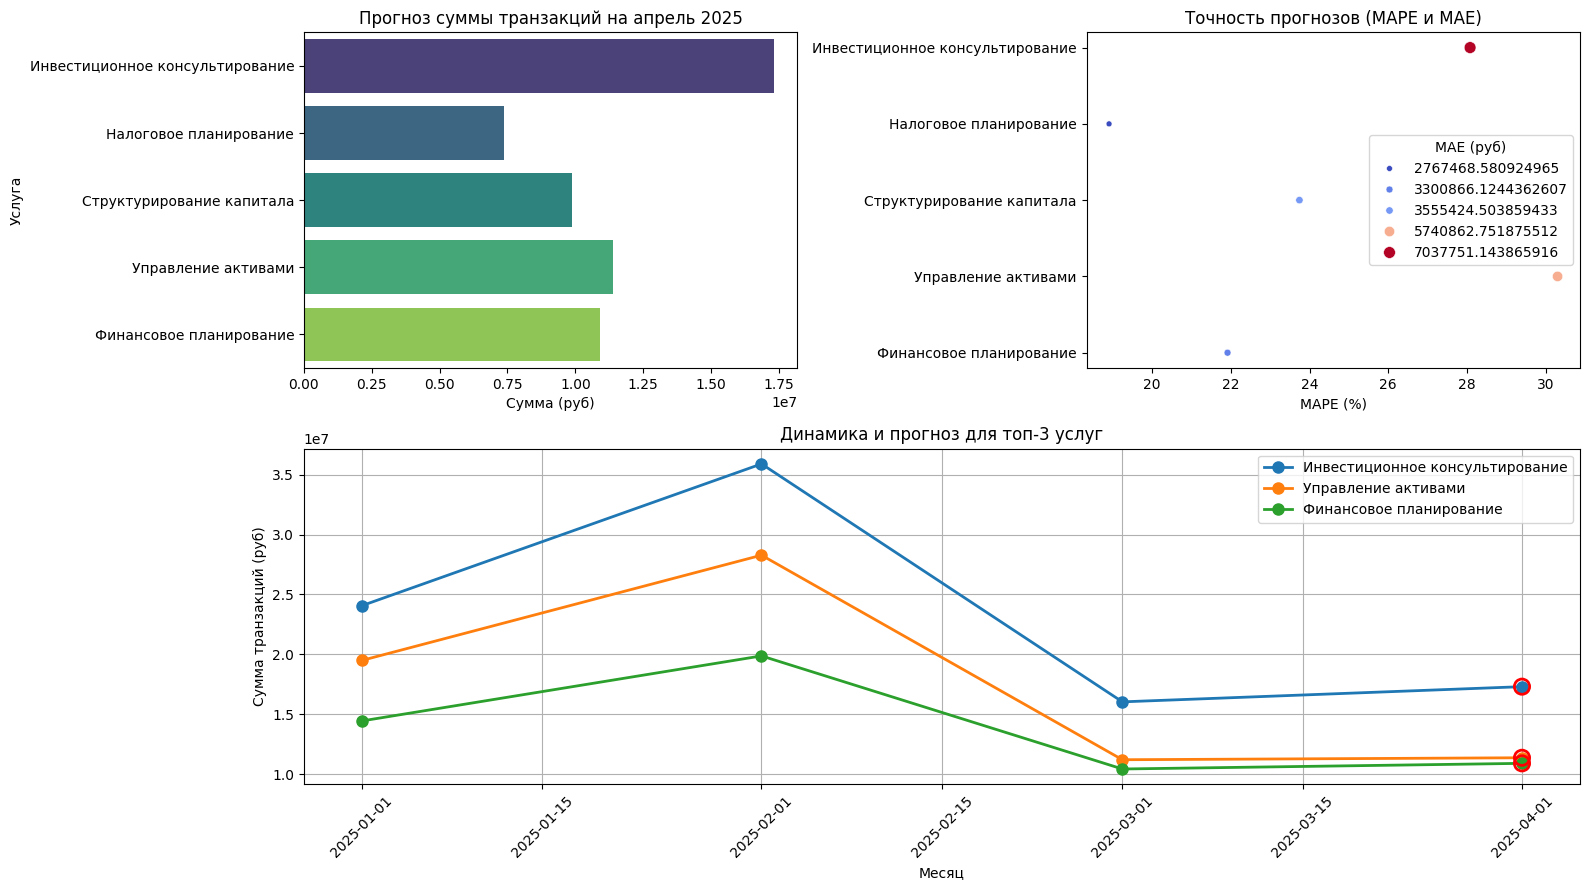

In [ ]:
plt.figure(figsize=(16, 9))

#  Прогнозируемые суммы
plt.subplot(2, 2, 1)
sns.barplot(data=forecast_df, x='prediction', y='service', palette='viridis')
plt.title('Прогноз суммы транзакций на апрель 2025')
plt.xlabel('Сумма (руб)')
plt.ylabel('Услуга')

#  Точность прогнозов
plt.subplot(2, 2, 2)
sns.scatterplot(data=forecast_df, x='mape', y='service', size='mae', hue='mae', palette='coolwarm')
plt.title('Точность прогнозов (MAPE и MAE)')
plt.xlabel('MAPE (%)')
plt.ylabel('')
plt.legend(title='MAE (руб)')

#  Динамика по топ-3 услугам
plt.subplot(2, 1, 2)
top_services = forecast_df.nlargest(3, 'prediction')['service']

for service in top_services:
    # Получаем фактические данные
    service_data = service_monthly[service_monthly['service'] == service]
    
    # Проверяем, что данные есть
    if len(service_data) == 0:
        continue
        
 
    pred = forecast_df[forecast_df['service'] == service]['prediction'].values[0]
    
    # Создаем полные данные для графика
    months = service_data['month'].tolist() + [service_data['month'].iloc[-1] + pd.DateOffset(months=1)]
    amounts = service_data['amount'].tolist() + [pred]
    
    # Рисуем линию
    plt.plot(months, amounts, 'o-', label=service, markersize=8, linewidth=2)
    
   
    plt.scatter(months[-1], amounts[-1], s=120, edgecolors='red', 
               facecolors='none', linewidths=2, zorder=5)

plt.title('Динамика и прогноз для топ-3 услуг')
plt.xlabel('Месяц')
plt.ylabel('Сумма транзакций (руб)')
plt.legend()
plt.grid(True)

 X

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Средние метрики по всем услугам
avg_mae = forecast_df['mae'].mean()
avg_mape = forecast_df['mape'].mean()

print(f'Средняя абсолютная ошибка (MAE): {avg_mae:,.0f} руб.')
print(f'Средняя абсолютная процентная ошибка (MAPE): {avg_mape:.1f}%')
print(f'\nОбщий прогнозируемый объем: {forecast_df["prediction"].sum():,.0f} руб.')

Средняя абсолютная ошибка (MAE): 4,480,475 руб.
Средняя абсолютная процентная ошибка (MAPE): 24.6%

Общий прогнозируемый объем: 56,843,549 руб.
